   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.5600

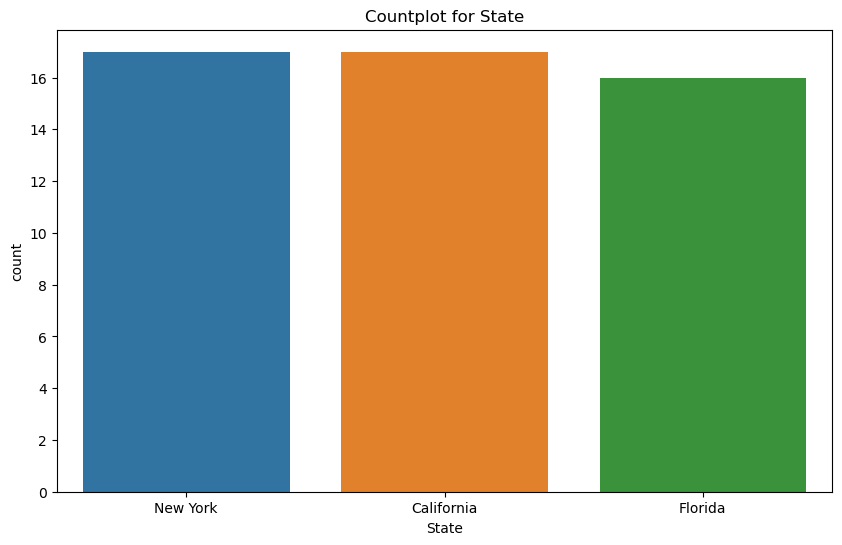

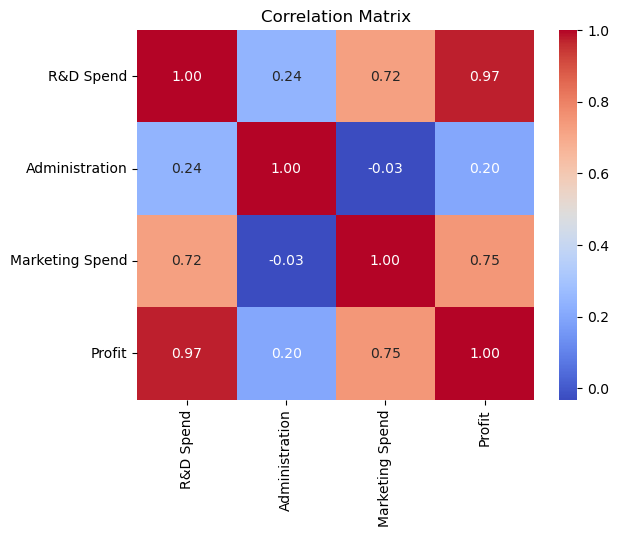

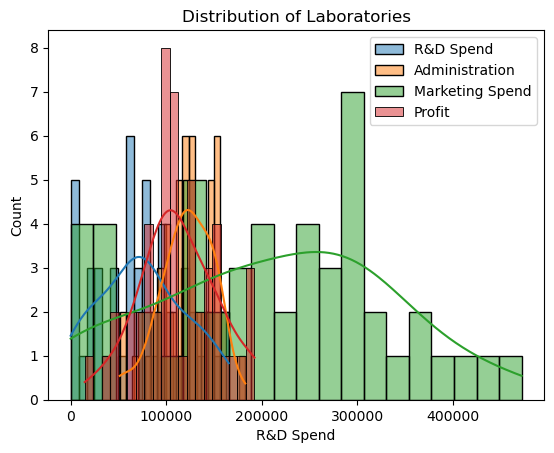

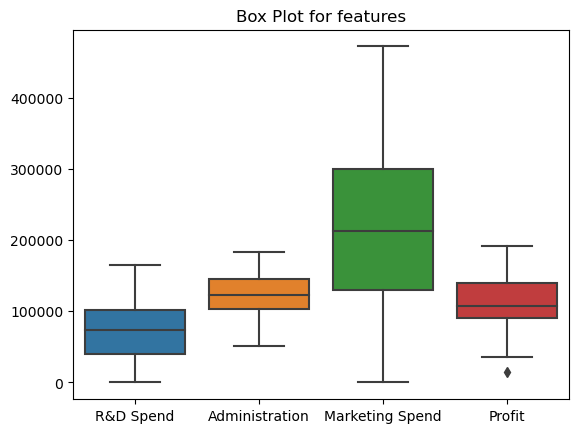

Imputed outliers for Profit with mean:
    R&D Spend  Administration  Marketing Spend       State   Profit
49        0.0        116983.8         45173.06  California  14681.4




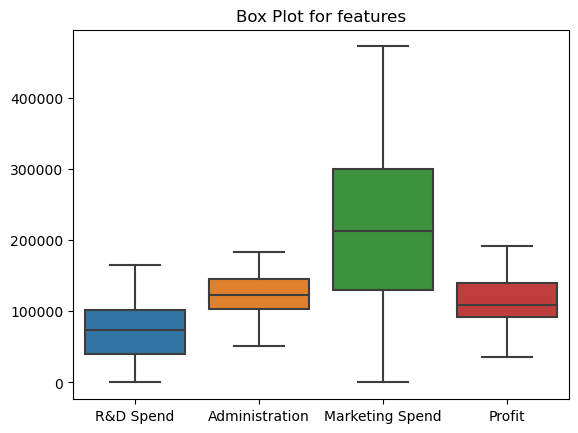

Average training error: 0.285
Average test error: 0.303
R square: 0.915
    Model  R-squared
0       1   0.914969
1       2   0.914969
2       3   0.914969
3       4   0.914969
4       5   0.914969
..    ...        ...
94     95   0.914969
95     96   0.914969
96     97   0.914969
97     98   0.914969
98     99   0.914969

[99 rows x 2 columns]
R square with cbrt transformation: 0.5387548188300847


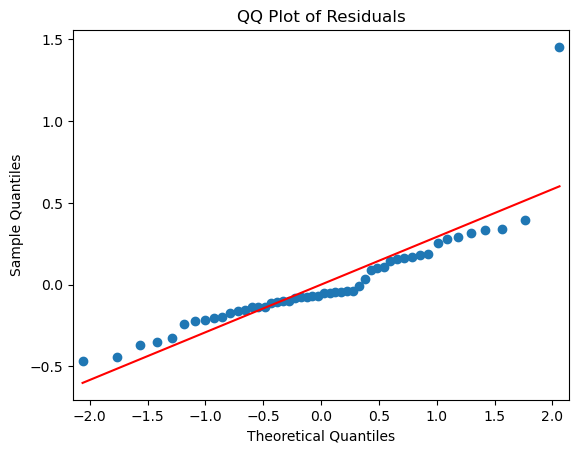

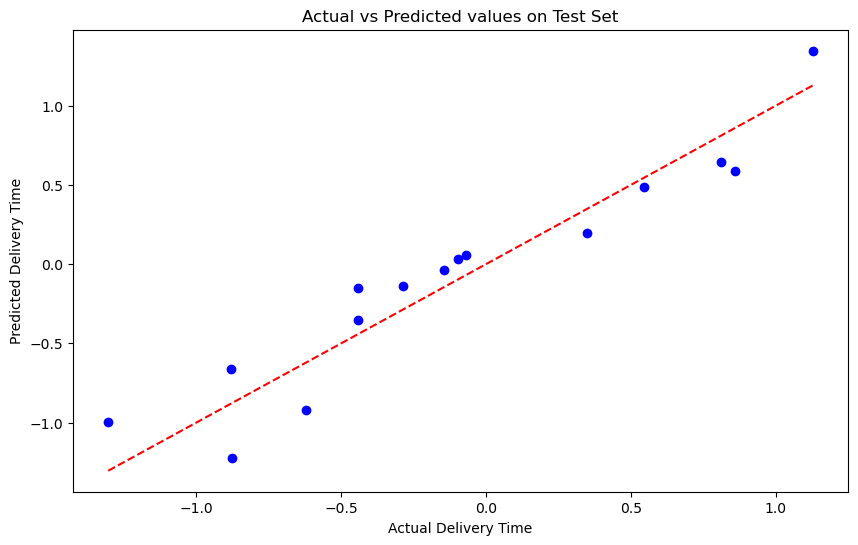

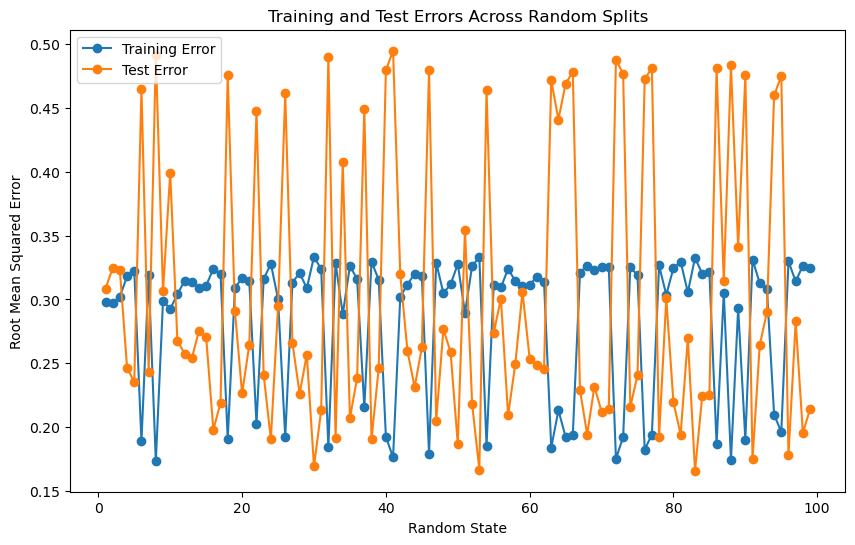

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("D:\\assignments\\50_Startups.csv")
list(df)

 
print(df.head())
print(df.describe())
print(df.info())
df.isnull().sum()


categorical_columns = ["State"]
numerical_columns = ["R&D Spend","Administration","Marketing Spend","Profit"]

for column in df[categorical_columns].columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df)
    plt.title(f"Countplot for {column}")
    plt.show()


correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


for column in df[numerical_columns].columns:
    sns.histplot(df[column], kde=True, bins=20, label=column)
plt.title('Distribution of Laboratories')
plt.legend()
plt.show()


sns.boxplot(data=df)
plt.title('Box Plot for features')
plt.show()


outlier_threshold = 1.5
for column in df[numerical_columns].columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - outlier_threshold * iqr
    upper_bound = q3 + outlier_threshold * iqr
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    
    if not outliers.empty:
        df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = df[column].mean()

        
        print(f"Imputed outliers for {column} with mean:")
        print(outliers)
        print("\n")
        

sns.boxplot(data=df)
plt.title('Box Plot for features')
plt.show()   
                

from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
df[numerical_columns] = SS.fit_transform(df[numerical_columns])


from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in categorical_columns:
    df[col] = LE.fit_transform(df[col])


X = df.drop('Profit', axis=1)
Y = df['Profit']


from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression
LR=LinearRegression()


from sklearn.metrics import mean_squared_error,r2_score


training_errors = []
test_errors = []

for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=i)
    LR.fit(X_train,Y_train)

    
    Y_pred_train = LR.predict(X_train)
    Y_pred_test  = LR.predict(X_test)
    training_errors.append(np.sqrt(mean_squared_error(Y_train ,Y_pred_train)))
    test_errors.append(np.sqrt(mean_squared_error(Y_test ,Y_pred_test)))
    
print("Average training error:",np.mean(training_errors).round(3))
print("Average test error:",np.mean(test_errors).round(3))


LR.fit(X,Y)
Y_pred = LR.predict(X)


r2 = r2_score(Y, Y_pred)
print("R square:", r2.round(3))


r2 = pd.DataFrame({'Model': range(1, 100), 'R-squared': r2})
print(r2)


Y_cbrt = np.cbrt(Y)
LR_cbrt = LinearRegression()
LR_cbrt.fit(X, Y_cbrt)
Y_pred_cbrt = LR_cbrt.predict(X)
Y_pred_inverse_cube = np.power(Y_pred_cbrt, 3)
# Calculate R-squared on the entire dataset
r2_cbrt = r2_score(Y, Y_pred_inverse_cube)
print("R square with cbrt transformation:", r2_cbrt)


residuals = Y - Y_pred
import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred_test, color='blue')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red')
plt.title('Actual vs Predicted values on Test Set')
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(range(1, 100), training_errors, label='Training Error', marker='o')
plt.plot(range(1, 100), test_errors, label='Test Error', marker='o')
plt.xlabel('Random State')
plt.ylabel('Root Mean Squared Error')
plt.title('Training and Test Errors Across Random Splits')
plt.legend()
plt.show()


